# MDF Signal Analysis with Pandas.

> pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. 

- https://pandas.pydata.org/

The example below is a quick start tutorial for getting MDF data into pandas. There is minimal data analysis and plotting below that.

Additional pandas analysis resources:

- Articles:
  - [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)  
    *This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the Cookbook.*
  - [Python Pandas Tutorial: A Complete Introduction for Beginners](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/)  
    *Learn some of the most important pandas features for exploring, cleaning, transforming, visualizing, and learning from data.*
  - [pandas Cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook).  
    *Short and sweet examples and links for useful pandas recipes.*
- Videos:
  - [Complete Python Pandas Data Science Tutorial! (Reading CSV/Excel files, Sorting, Filtering, Groupby)](https://www.youtube.com/watch?v=vmEHCJofslg) [01:00:26]
  - [Intro to Data Analysis / Visualization with Python, Matplotlib and Pandas | Matplotlib Tutorial](https://www.youtube.com/watch?v=a9UrKTVEeZA)

In [1]:
from asammdf import MDF
# Signals generated in 90_BasicSignals.
mdf = MDF("90_BasicSignals.mf4")

## Plot

Plot each of the channels through ```asammdf```.

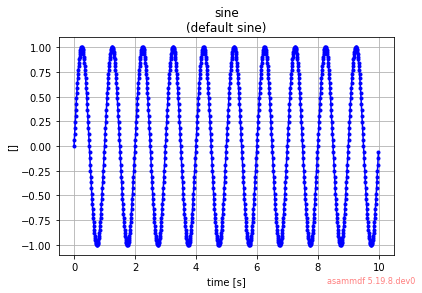

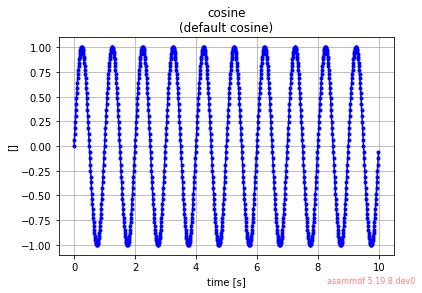

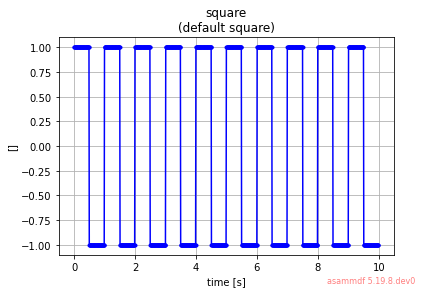

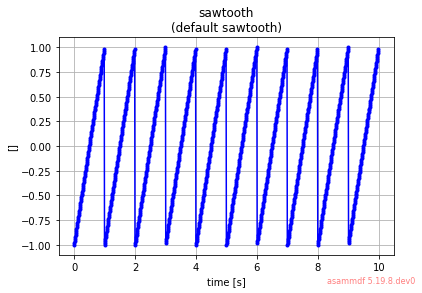

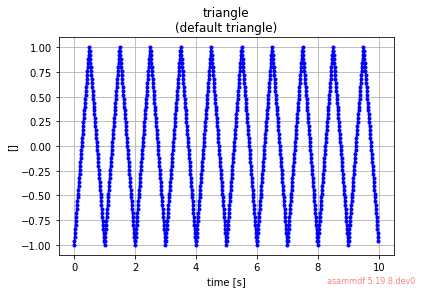

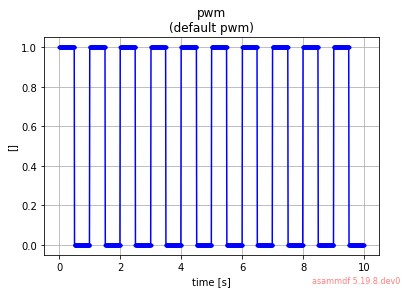

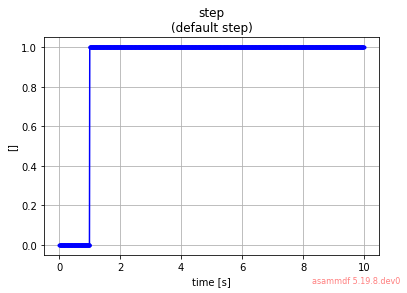

In [2]:
for channel in mdf.iter_channels():
    channel.plot()

# Convert to pandas DataFrame 

In [3]:
df = mdf.to_dataframe()

In [4]:
df

,sine,cosine,square,sawtooth,triangle,pwm,step
timestamps,,,,,,,
0.000000,0.000000,0.000000,1.0,-1.000000,-1.000000,1.0,0.0
0.010000,0.062791,0.062791,1.0,-0.980000,-0.960000,1.0,0.0
0.020000,0.125333,0.125333,1.0,-0.960000,-0.920000,1.0,0.0
0.030000,0.187381,0.187381,1.0,-0.940000,-0.880000,1.0,0.0
0.040000,0.248690,0.248690,1.0,-0.920000,-0.840000,1.0,0.0
...,...,...,...,...,...,...,...
9.950000,-0.309018,-0.309018,-1.0,0.899999,-0.799998,0.0,1.0
9.960000,-0.248687,-0.248687,-1.0,0.920000,-0.840001,0.0,1.0
9.969999,-0.187382,-0.187382,-1.0,0.939999,-0.879998,0.0,1.0


> *Generate descriptive statistics.*  
> *Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.*  
> - [pandas.DataFrame.describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

In [17]:
df.describe()

,sine,cosine,square,sawtooth,triangle,pwm,step
count,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.00000
mean,1.907349e-09,1.907349e-09,0.002000,-4.000228e-03,-9.597974e-09,0.501000,0.90000
std,7.074606e-01,7.074606e-01,1.000498,5.776830e-01,5.778701e-01,0.500249,0.30015
min,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000e+00,0.000000,0.00000
25%,-6.956536e-01,-6.956536e-01,-1.000000,-5.000001e-01,-4.900004e-01,0.000000,1.00000
50%,-1.192488e-08,-1.192488e-08,1.000000,-5.960464e-08,0.000000e+00,1.000000,1.00000
75%,6.956536e-01,6.956536e-01,1.000000,4.999998e-01,4.900009e-01,1.000000,1.00000
max,1.000000e+00,1.000000e+00,1.000000,9.999999e-01,9.999999e-01,1.000000,1.00000


## Plotting

In [18]:
import seaborn as sns
sns.set()

Plot the pandas dataframe, all signals on the same plot.

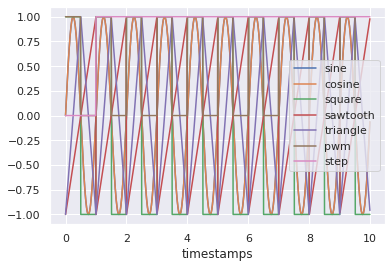

In [19]:
df.plot()

Plot the signal in a loop on the same plot.

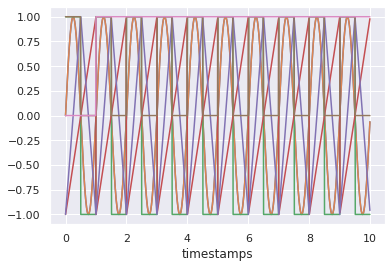

In [20]:
for signal_name in df.columns:
    signal = getattr(df, signal_name)
    signal.plot()

Plot the signals on a new figure in a loop with title, ylabel

In [15]:
import matplotlib.pyplot as plt

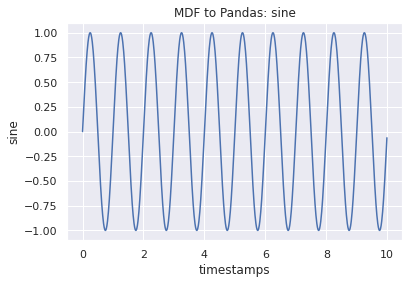

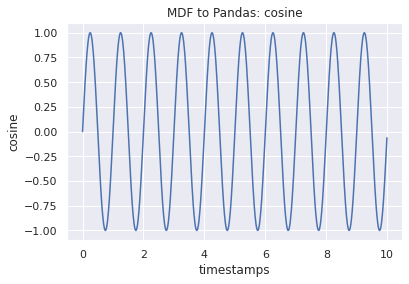

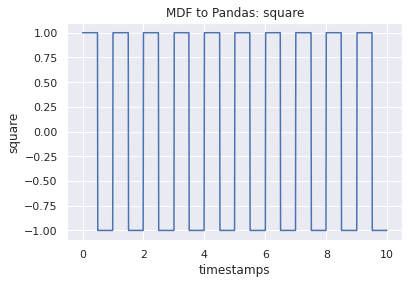

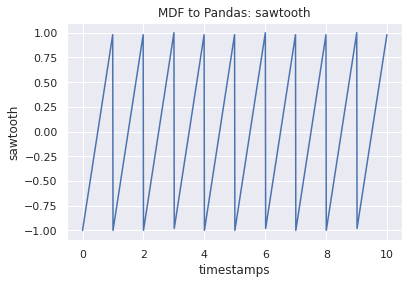

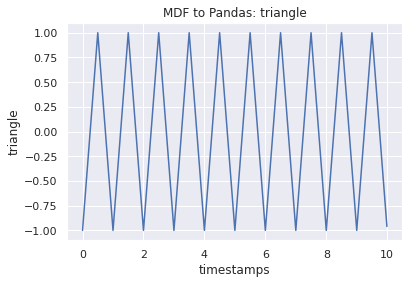

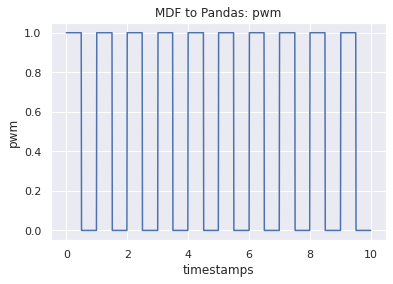

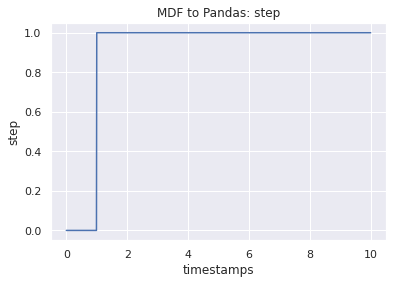

In [16]:
for signal_name in df.columns:
    signal = getattr(df, signal_name)
    signal.plot()
    plt.ylabel(signal_name)
    plt.title(f"MDF to Pandas: {signal_name}")
    plt.show()